In [1]:
from langchain_groq import ChatGroq
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain.schema import HumanMessage, AIMessage, SystemMessage, FunctionMessage

In [7]:
llm = ChatGroq(temperature=0, model_name="llama3-70b-8192")

In [2]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]

In [8]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

In [4]:
graph_builder = StateGraph(State)

graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, "chatbot")

graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()

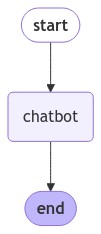

In [5]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [11]:
def print_last_ai_message(state):
    messages = state['messages']
    for message in reversed(messages):
        if isinstance(message, AIMessage):
            print("AI Response:")
            print("-" * 40)
            print(message.content)
            print("-" * 40)
            break
    else:
        print("No AI message found in the state.")


In [12]:
initial_state = {"messages": [HumanMessage(content='Do you know the last 5 matches of the argentinian league?')]}
result = graph.invoke(initial_state)
print_last_ai_message(result)

AI Response:
----------------------------------------
I'm a large language model, I don't have have real-time access to current or recent sports scores. However, I can suggest some ways for you to find the information you're looking for:

1. Check online sports websites: Websites like ESPN, Fox Sports, or Goal.com often provide updates on recent matches, including scores and summaries.
2. Visit the official Argentine Football Association website: The official website of the Argentine Football Association (AFA) may have a section dedicated to the latest matches and scores of the Argentine league.
3. Look for sports news websites or apps: Websites like Sofascore, Flashscore, or sports news apps like Forza Football or OneFootball may have the information you're looking for.
4. Check social media: Follow Argentine football clubs or sports journalists on social media platforms like Twitter or Instagram, where they often share updates on recent matches.

If you're looking for a specific leag